In [6]:
using Gadfly
using Interact
using Distributions

In [2]:
set_default_plot_size(25cm, 16.66cm)

<br>

$ \huge \textsf{An Equilibrium Business-Cycle Model}$

---

$ \large \textsf{Key Equations}$

$$\begin{align} \normalsize
&\textsf{Real Household Budget Constraint:}&
&C + (1/P) \cdot \Delta B + \Delta K = (w/P) \cdot L^s + i \cdot (B/P + \kappa \cdot K) \tag{1} \\
\\
&\textsf{No-Arbitrage Condition:}&
&i = (r/P) \cdot \kappa + \delta (\kappa) \tag{2} \\
\\
&\textsf{Marginal Product of Capital:}&
&MPK = A \cdot \alpha \cdot K^{(\alpha -1)} \cdot L^{(1 - \alpha)} \tag{3} \\
\\
&\textsf{Marginal Product of Labour:}&
&MPL = A \cdot (1-\alpha) \cdot K^\alpha \cdot L^{- \alpha} \tag{4} \\
\end{align}$$

<br>

In [3]:
MPK(A, K, L, α) = A*α*K.^(α-1)*L^(1-α)

MPL(A, K, L, α) = A*(1-α)*K^α*L.^(-α)

BC(w_P, r_P, L_S, K_S, δ, C) = w_P*L_S+(r_P-δ)*K_S - C

BC (generic function with 1 method)

In [4]:
#Initial state
A0 = 5
L_S=50
K_S=50
α=0.5 # such that 1-α = 0.5, in this case
w_P0 = MPL(A0, K_S, L_S, α)
r_P0 = MPK(A0, K_S, L_S, α)
domain = linspace(0, 400, 200) 
Y = [];

Interact.Options{:SelectionSlider,Int64}(1: "input" = 5 Int64 , "A", 5, "5", 5, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 1.5 Float64 , "ω", 1.5, "1.5", 2, Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5), Dict(2.0=>"2.0",2.5=>"2.5",1.5=>"1.5",1.0=>"1.0")), Any[], Any[], true, "horizontal", true)

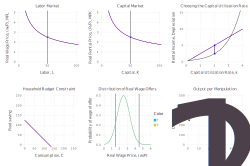

In [5]:
@manipulate for A in 1:10, ω in 1:0.5:2.5
        
    k_domain=linspace(0.1, 4, 20)
    w_P = MPL(A, K_S, L_S, α)
    r_P = MPK(A, K_S, L_S, α)
    k0 = log.(3*r_P0)
    k = log.(3*r_P)
    push!(Y, A*L_S^0.5*K_S^0.5)
    
    # Capital Market    
    labor_market = plot(
        layer(x=[L_S], y=[w_P0], Geom.point, Theme(default_color=colorant"blue")),
        layer(x=[L_S], y=[w_P], Geom.point, Theme(default_color=colorant"red")),
        layer(xintercept=[L_S], Geom.vline(color=["black"])),
        layer(x=domain, y=MPL(5, K_S, domain, α), Geom.line, Theme(default_color=colorant"blue")),
        layer(x=domain, y=MPL(A, K_S, domain, α), Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Labor Market"),
        Guide.xlabel("Labor, L"),
        Guide.ylabel("Real Wage Price, (w/P), MPL")
        )
    
    
    # Capital Market
    capital_market = plot(
        layer(x=[K_S], y=[r_P0], Geom.point, Theme(default_color=colorant"blue")),
        layer(x=[K_S], y=[r_P], Geom.point, Theme(default_color=colorant"red")),
        layer(xintercept=[K_S], Geom.vline(color=["black"])),
        layer(x=domain, y=MPK(5, domain, L_S, α), Geom.line, Theme(default_color=colorant"blue")),
        layer(x=domain, y=MPK(A, domain, L_S, α), Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=5),
        Guide.Title("Capital Market"),
        Guide.xlabel("Capital, K"),
        Guide.ylabel("Real Rental Price, (R/P), MPK")
        )

    
    # k_rate    
    k_rate = plot(
        layer(x=[k0 k0], y=[k0*r_P0 (1/3)*e.^k0], Geom.line, Geom.point, Theme(default_color=colorant"blue")),
        layer(x=[k k], y=[k*r_P (1/3)*e.^k], Geom.line, Geom.point, Theme(default_color=colorant"red")),
        layer(x=k_domain, y=(1/3)*e.^k_domain, Geom.line, Theme(default_color=colorant"black")),
        layer(x=k_domain, y=k_domain*r_P0, Geom.line, Theme(default_color=colorant"blue")),
        layer(x=k_domain, y=k_domain*r_P, Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=4,ymin=0,ymax=15),
        Guide.Title("Choosing the Capital Utilization Rate"),
        Guide.xlabel("Capital Utilization Rate, k"),
        Guide.ylabel("Rental Income, Depreciation")
        )
    
    
    # Budget
    budget = plot(
        layer(x=domain, y=BC(w_P0, r_P0, L_S, K_S*k0, (1/3)*e^k0, domain), Geom.line, Theme(default_color=colorant"blue")),
        layer(x=domain, y=BC(w_P, r_P, L_S, K_S*k, (1/3)*e^k, domain), Geom.line, Theme(default_color=colorant"red")),
        Coord.Cartesian(xmin=0,xmax=250,ymin=0,ymax=250, fixed=true),
        Guide.Title("Household Budget Constraint"),
        Guide.xlabel("Consumption, C"),
        Guide.ylabel("Real saving")
        )
    
    # Wages
    wages = plot(
        layer([x -> pdf(Normal(w_P0,0.8), x), x -> pdf(Normal(w_P,0.8), x)], 0, 6),
        layer(xintercept=[ω ω+3], Geom.vline(color=["black"])),
        Guide.Title("Distribution of Real Wage Offers"),
        Guide.xlabel("Real Wage Price, (w/P)"),
        Guide.ylabel("Probability of wage of offer")
        )
    
    
    # GDP
    gdp = plot(
        layer(x=1:length(Y), y=Y, Geom.line, Geom.point, Theme(default_color=colorant"black")),
        Coord.Cartesian(xmin=0,xmax=50,ymin=0,ymax=500),
        Guide.Title("Output per Manipulation"),
        Guide.xlabel("Year"),
        Guide.ylabel("Output, Y")
        )
    
    
    vstack(hstack(labor_market, capital_market, k_rate), hstack(budget, wages, gdp))

end

<br>